In [104]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

In [105]:
df_o = pd.read_csv("./data/식물_전처리 - merged_df(4차)_2.csv")

In [106]:
df_o

,cntntsNo(컨텐츠 번호),cntntsSj(식물 명),clCodeNm(꽃 여부),열매여부,다육,덩굴,growthAraInfo (성장 넓이 정보),growthHgInfo (성장 높이 정보),lighttdemanddoCodeNm (광요구도 코드),managedemanddoCode (관리요구도 코드),watercycleSummerCode (물주기 여름 코드)
0,12938,가울테리아,1,1,0,0,1,1,2,58001,53003
1,12954,개운죽,0,0,0,0,2,2,1,58001,53002
2,12955,골드크레스트 '윌마',0,0,0,0,2,3,4,58002,53003
3,12957,공작야자,0,0,0,0,3,3,2,58003,53003
4,12962,관엽베고니아,1,0,0,0,2,1,2,58002,53003
...,...,...,...,...,...,...,...,...,...,...,...
212,12932,황금죽,0,0,0,0,2,3,2,58003,53003
213,12956,후피향나무,0,0,0,0,2,3,4,58001,53003
214,12920,흰꽃나도사프란,1,0,0,0,2,1,4,58001,53003
215,12919,흰줄무늬달개비(트라데스칸티아),0,0,0,1,2,1,2,58002,53003


In [107]:
df = df_o.drop(columns='cntntsSj(식물 명)')

In [108]:
new_column_names = ["cntntsNo", "clCodeNm", "fruit", "succulent", "vine",\
                    "growthAra", "growthHg", "lightdemand", "manage", "watercycle"]
df.columns = new_column_names
df.head()

,cntntsNo,clCodeNm,fruit,succulent,vine,growthAra,growthHg,lightdemand,manage,watercycle
0,12938,1,1,0,0,1,1,2,58001,53003
1,12954,0,0,0,0,2,2,1,58001,53002
2,12955,0,0,0,0,2,3,4,58002,53003
3,12957,0,0,0,0,3,3,2,58003,53003
4,12962,1,0,0,0,2,1,2,58002,53003


In [109]:
df

,cntntsNo,clCodeNm,fruit,succulent,vine,growthAra,growthHg,lightdemand,manage,watercycle
0,12938,1,1,0,0,1,1,2,58001,53003
1,12954,0,0,0,0,2,2,1,58001,53002
2,12955,0,0,0,0,2,3,4,58002,53003
3,12957,0,0,0,0,3,3,2,58003,53003
4,12962,1,0,0,0,2,1,2,58002,53003
...,...,...,...,...,...,...,...,...,...,...
212,12932,0,0,0,0,2,3,2,58003,53003
213,12956,0,0,0,0,2,3,4,58001,53003
214,12920,1,0,0,0,2,1,4,58001,53003
215,12919,0,0,0,1,2,1,2,58002,53003


In [110]:
df = df.set_index('cntntsNo')

In [111]:
inertia_list = []
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    inertia_list.append(km.inertia_)

c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

<AxesSubplot: >

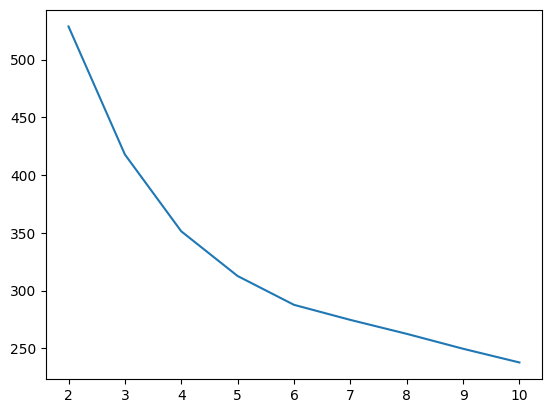

In [112]:
sns.lineplot(x=range(2,11),y=inertia_list)
# 엘보 스코어가 안 보임 

In [113]:
from sklearn.metrics import silhouette_score

In [114]:
score = []
for i in range(2,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(df)
    pred=km.predict(df)
    score.append(silhouette_score(df,pred))

c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

<AxesSubplot: >

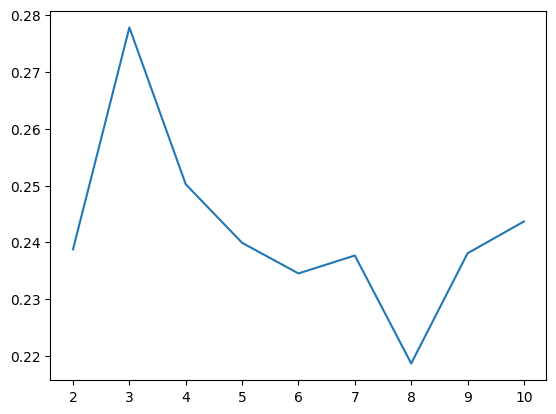

In [115]:
sns.lineplot(x=range(2,11),y=score)

In [116]:
n_clusters = 3

In [117]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df)

c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [118]:
pred = kmeans.predict(df)

In [119]:
pred

array([2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2,
       2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 2,
       1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2])

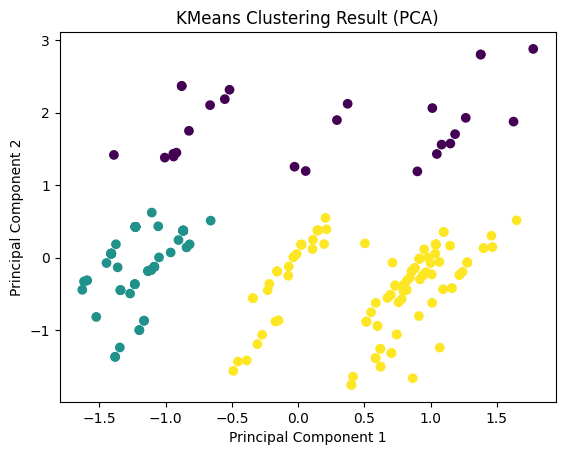

In [120]:
from sklearn.decomposition import PCA

# Assuming df_dum has multiple features
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Result (PCA)')
plt.show()


In [121]:
user_data = np.array([0, 0, 0, 0, 2, 1, 4, 58003, 53002])
ej_data = np.array([0,1,0,0,1,1,3,58001])
sy_data = np.array([0,0,0,0,1,1,2,58002,53003])

In [122]:
df.head(1)

,clCodeNm,fruit,succulent,vine,growthAra,growthHg,lightdemand,manage,watercycle
cntntsNo,,,,,,,,,
12938,1,1,0,0,1,1,2,58001,53003


### 유클리디안 거리

In [123]:
def euclidean(user_data):
    distances = euclidean_distances(user_data.reshape(1, -1), df)
    user_index = np.argmin(distances)
    cluster_indices = np.where(pred == pred[user_index])[0]  # Get indices of points in the same cluster
    cluster_distances = distances[:, cluster_indices]  # Extract distances of points in the same cluster
    most_similar_index = np.argmin(cluster_distances)  # Find the index of the most similar point within the cluster
    most_similar_point_index = cluster_indices[most_similar_index]  # Get the index of the most similar point in the original DataFrame

    most_similar_point = df.iloc[most_similar_point_index]  # Get the most similar point from the original DataFrame

    print("Most similar point:")
    print(most_similar_point)
    column_values = df_o.loc[df_o['cntntsNo(컨텐츠 번호)'] == most_similar_point.name, "cntntsSj(식물 명)"]
    print("Recommended plants:", column_values)

In [124]:
euclidean(sy_data)

Most similar point:
clCodeNm           0
fruit              0
succulent          0
vine               0
growthAra          1
growthHg           1
lightdemand        2
manage         58002
watercycle     53003
Name: 18581, dtype: int64
Recommended plants: 144    은사철나무
Name: cntntsSj(식물 명), dtype: object


In [125]:
def euclidean_three(user_data):
    distances = euclidean_distances(user_data.reshape(1, -1), df)
    most_similar_point_indices = []
    most_similar_points = []
    user_index = np.argmin(distances)
    cluster_indices = np.where(pred == pred[user_index])[0]  # Get indices of points in the same cluster
    cluster_distances = distances[:, cluster_indices]  # Extract distances of points in the same cluster

    # Find the indices of the 3 most similar points within the cluster
    most_similar_indices = np.argsort(cluster_distances)[0][:3]
    most_similar_indices = most_similar_indices.tolist()

    for index in most_similar_indices:
        most_similar_point_indices.append(cluster_indices[index])
    # Get the 3 most similar points from the original DataFrame
    for index in most_similar_point_indices:
        most_similar_points.append(df.iloc[index])

    # Print the 3 most similar points
    for most_similar_point in most_similar_points:
        print(most_similar_point)
        recommended_plant = df_o.loc[df_o['cntntsNo(컨텐츠 번호)'] == most_similar_point.name, "cntntsSj(식물 명)"]
        print("Recommended plants:", recommended_plant )


In [126]:
euclidean_three(sy_data)

clCodeNm           0
fruit              0
succulent          0
vine               0
growthAra          1
growthHg           1
lightdemand        2
manage         58002
watercycle     53003
Name: 18581, dtype: int64
Recommended plants: 144    은사철나무
Name: cntntsSj(식물 명), dtype: object
clCodeNm           0
fruit              0
succulent          0
vine               0
growthAra          2
growthHg           1
lightdemand        2
manage         58002
watercycle     53003
Name: 18599, dtype: int64
Recommended plants: 70    무늬접란
Name: cntntsSj(식물 명), dtype: object
clCodeNm           0
fruit              0
succulent          0
vine               0
growthAra          1
growthHg           1
lightdemand        2
manage         58003
watercycle     53003
Name: 19706, dtype: int64
Recommended plants: 105    수박페페로미아
Name: cntntsSj(식물 명), dtype: object


### 코사인 유사도

In [127]:
def cosine(user_data):
    similarities = cosine_similarity(user_data.reshape(1, -1), df)
    user_index = np.argmax(similarities)
    cluster_indices = np.where(pred == pred[user_index])[0]  # Get indices of points in the same cluster
    cluster_similar = similarities[:, cluster_indices]  # Extract distances of points in the same cluster
    most_similar_index = np.argmax(cluster_similar)  # Find the index of the most similar point within the cluster
    most_similar_point_index = cluster_indices[most_similar_index]  # Get the index of the most similar point in the original DataFrame

    most_similar_point = df.iloc[most_similar_point_index]  # Get the most similar point from the original DataFrame

    print("Most similar point:")
    print(most_similar_point)
    column_values = df_o.loc[df_o['cntntsNo(컨텐츠 번호)'] == most_similar_point.name, "cntntsSj(식물 명)"]
    print("Recommended plants:", column_values)

In [128]:
cosine(sy_data)

Most similar point:
clCodeNm           0
fruit              0
succulent          0
vine               0
growthAra          1
growthHg           1
lightdemand        2
manage         58002
watercycle     53003
Name: 18581, dtype: int64
Recommended plants: 144    은사철나무
Name: cntntsSj(식물 명), dtype: object


In [129]:
def cosine_three(user_data):
    similarities = cosine_similarity(user_data.reshape(1, -1), df)
    most_similar_point_indices = []
    most_similar_points = []
    user_index = np.argmax(similarities)
    cluster_indices = np.where(pred == pred[user_index])[0]  # Get indices of points in the same cluster
    cluster_similar = similarities[:, cluster_indices]  # Extract distances of points in the same cluster

    # Find the indices of the 3 most similar points within the cluster
    most_similar_indices = np.argsort(cluster_similar)[0][::-1][:3]
    most_similar_indices = most_similar_indices.tolist()

    for index in most_similar_indices:
        most_similar_point_indices.append(cluster_indices[index])
    # Get the 3 most similar points from the original DataFrame
    for index in most_similar_point_indices:
        most_similar_points.append(df.iloc[index])

    # Print the 3 most similar points
    for most_similar_point in most_similar_points:
        print(most_similar_point)
        recommended_plant = df_o.loc[df_o['cntntsNo(컨텐츠 번호)'] == most_similar_point.name, "cntntsSj(식물 명)"]
        print("Recommended plants:", recommended_plant )

    

In [130]:
cosine_three(sy_data)

clCodeNm           0
fruit              0
succulent          0
vine               0
growthAra          1
growthHg           1
lightdemand        2
manage         58002
watercycle     53003
Name: 18581, dtype: int64
Recommended plants: 144    은사철나무
Name: cntntsSj(식물 명), dtype: object
clCodeNm           0
fruit              0
succulent          0
vine               0
growthAra          1
growthHg           1
lightdemand        2
manage         58003
watercycle     53003
Name: 16038, dtype: int64
Recommended plants: 54    마란타 류코뉴라
Name: cntntsSj(식물 명), dtype: object
clCodeNm           0
fruit              0
succulent          0
vine               0
growthAra          1
growthHg           1
lightdemand        2
manage         58003
watercycle     53003
Name: 19706, dtype: int64
Recommended plants: 105    수박페페로미아
Name: cntntsSj(식물 명), dtype: object
